<h1 style="text-align: center;">Zomtato - Analysis & Prediction</h1>


<img style="display: block; margin-left: auto; margin-right: auto; width: 50%;" src="https://storage.googleapis.com/kaggle-datasets-images/153420/352891/c163500aee56f5201e1187c42e19471c/dataset-cover.jpg?t=2019-03-31-11-02-46" alt="image.png">


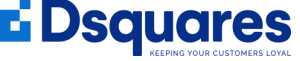


# Context:

Restaurants from all over the world can be found here in Bengaluru. From the United States to

Japan, Russia to Antarctica, you get all types of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks, 
Buffet, Desserts, you name it and Bengaluru has it.

Bengaluru is the best place for foodies. The number of restaurants is increasing day by day. 

Currently it stands at approximately 12,000 restaurants. With such a high number of restaurants. 
This industry hasn't been saturated yet. And new restaurants are opening every day.

However, it has become difficult for them to compete with already established restaurants.
The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, 
shortage of quality manpower, fragmented supply chain and over-licensing. 
This Zomato data aims at analyzing the demography of the location. 
Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc. 
for a particular location. 
It also aims at finding similarity between neighborhoods of Bengaluru based on food. The dataset also contains reviews 
for each of the restaurants which will help in finding overall rating for the place.


# Problem

We want to create model that can classify if the restuarabt will close or no

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


# Import Depndences

In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split , cross_val_score#Splitting of Dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, classification_report
from pandas_profiling import profile_report         # for Explore our Data before jumbing into Preprocessing
# from sklearn.externals import joblib                # for saving our Model
import joblib

%matplotlib inline

# 

# read our Dataset

In [3]:
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Preprocessing

In [4]:
# df.profile_report()     # Get full report for df

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# Drop the use less columns from our df
df = df.drop(['url', 'address', 'phone', 'dish_liked', 'menu_item', 'reviews_list'], axis = 1)
df.head()
#Deleting Unnnecessary Columns

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Rename Columns

In [9]:
# rename columns to be easy encoded
df.rename({'approx_cost(for two people)': 'cost',
               'listed_in(type)':'type',
               'listed_in(city)':'city'
              }, axis=1, inplace=True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

### Cleaning votes and approx_cost_for_2_people
Converting "votes" and "approx_cost_for_2_people" into numeric(int)

"votes" and "approx_cost_for_2_people" have values like 1,000. So we will change them into pure numeric values. For this, we will use the lambda function


In [10]:
#Convert cost objecttype into numerical type
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          43942 non-null  object 
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   cost          51371 non-null  float64
 9   type          51717 non-null  object 
 10  city          51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


### Cleaning rate

Now we will remove '/5' from rateDisplay unique values of `rate`

In [11]:
# We remove the restaurent datas which has rate='NEW'
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)

In [12]:
# remove '/5' from rateDisplay unique values of reviews_list
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

/tmp/ipykernel_33/3959761865.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x


In [13]:
df.rate.dtype             # check dtype after editing

dtype('float64')

### Remove Listed_in_city

**I noticed that there is a similarity between `listed_in_city` and `Location`**
So that lets drop any one

In [14]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'Electronic City', 'HSR', 'Marathahalli',
       'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima Nagar', 'Old

In [15]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [16]:
df = df.drop(['city'], axis = 1)

### Cleaning Location Column

In [17]:
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      4793
others                   4521
Koramangala 5th Block    2442
HSR                      2414
JP Nagar                 2103
Whitefield               2033
Indiranagar              1994
Jayanagar                1851
Marathahalli             1786
Bannerghatta Road        1541
Bellandur                1220
Brigade Road             1186
Koramangala 7th Block    1152
Electronic City          1134
Koramangala 1st Block    1125
Koramangala 6th Block    1122
Sarjapur Road            1012
Koramangala 4th Block     994
Ulsoor                    971
MG Road                   893
Banashankari              845
Kalyan Nagar              803
Richmond Road             790
Frazer Town               719
Malleshwaram              709
Residency Road            672
Basavanagudi              651
Banaswadi                 645
New BEL Road              634
Kammanahalli              624
Brookefield               622
Rajajinagar               565
Church Street             565
L

### Cleaning Rest Types Column

Making Rest Types less than 1000 in frequency as others

In [19]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_type_lessthan1000 = rest_types[rest_types<1000]
def handle_rest_type(value):
    if(value in rest_type_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           18003
Casual Dining         10066
others                 8805
Cafe                   3610
Delivery               2493
Dessert Parlor         2188
Takeaway, Delivery     1857
Casual Dining, Bar     1123
Bakery                 1070
Name: count, dtype: int64

### Cleaning Cuisiness column

In [20]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                            25667
North Indian                       2777
North Indian, Chinese              2305
South Indian                       1742
Biryani                             886
                                  ...  
Chinese, Thai, Momos                110
Cafe, Bakery                        110
Beverages, Desserts                 105
Italian, Pizza                      105
North Indian, Mughlai, Chinese      101
Name: count, Length: 67, dtype: int64

### Cleaning online_order and book_table

In [21]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
dict_for_convert = {
    'Yes': True,
    'No': False
}

df[['online_order', 'book_table']] = df[['online_order', 'book_table']].replace(dict_for_convert).astype(int)

### Dealing with Missing values

In [24]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        225
cuisines          45
cost             341
type               0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          49440 non-null  object 
 1   online_order  49440 non-null  int64  
 2   book_table    49440 non-null  int64  
 3   rate          41665 non-null  float64
 4   votes         49440 non-null  int64  
 5   location      49419 non-null  object 
 6   rest_type     49215 non-null  object 
 7   cuisines      49395 non-null  object 
 8   cost          49099 non-null  float64
 9   type          49440 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.8+ MB


## Remove the NaN values from the dataset:


In [26]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41263 entries, 0 to 49439
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41263 non-null  object 
 1   online_order  41263 non-null  int64  
 2   book_table    41263 non-null  int64  
 3   rate          41263 non-null  float64
 4   votes         41263 non-null  int64  
 5   location      41263 non-null  object 
 6   rest_type     41263 non-null  object 
 7   cuisines      41263 non-null  object 
 8   cost          41263 non-null  float64
 9   type          41263 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.5+ MB


### Another way to deal with Misssing values
Fill missing values in `rate` , `approx_cost_for_2_peapole`
with mean() for all of them

In [27]:
# df['rate'] = df['rate'].fillna(df['rate'].mean())
# df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].fillna(
#                                          df['approx_cost_for_2_people'].mean())

Handeling missing values in categorical with most frequent

In [28]:
# # List of categorical columns
# categorical_columns = ['location', 'rest_type', 'cuisines']

# # Fill missing values with the most frequent value in each column
# for column in categorical_columns:
#     df[column] = df[column].fillna(df[column].mode()[0])

In [29]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
dtype: int64

In [30]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [31]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'others', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'St. Marks Road', 'Cunningham Road',
       'Commercial Street', 'Domlur', 'Koramangala 8th Block', 'Ejipura',
       'Kammanahalli', 'Koramangala 6th Block', 'Brookefield',
       'Koramangala 4th Block', 'Banaswadi', 'Kalyan Nagar',
       'Malleshwaram', 'Rajajinagar', 'New BEL Road'], dtype=object)

Check and Drop Duplicated Obzervations

In [32]:
df.duplicated().sum()

14472

In [33]:
df = df.drop_duplicates()

## Create the Target Column

I will create your target by creating a new column called “Target” 

whose value will be “1” if the rate column has a value larger than or 

equal 3.75 , or “0” for the rates lower than 3.75.

In [34]:
def Target(x):
    if pd.notna(x['rate']):
        if x['rate'] >= 3.75:
            return 1
        else:
            return 0
    else:
        return np.nan
        
df['Target'] = df.apply(Target,axis=1)

In [35]:
df['Target'].isnull().sum()

0

In [36]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,Target
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,1
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,San Churro Cafe,1,0,3.8,918,Banashankari,others,others,800.0,Buffet,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


In [37]:
df.shape

(26791, 11)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26791 entries, 0 to 49439
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          26791 non-null  object 
 1   online_order  26791 non-null  int64  
 2   book_table    26791 non-null  int64  
 3   rate          26791 non-null  float64
 4   votes         26791 non-null  int64  
 5   location      26791 non-null  object 
 6   rest_type     26791 non-null  object 
 7   cuisines      26791 non-null  object 
 8   cost          26791 non-null  float64
 9   type          26791 non-null  object 
 10  Target        26791 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


## Hypothis Testing

In [39]:
from scipy.stats import ttest_ind
# Use scipy ttest_ind function to perform a t-test on the rate column by the Target column
# The null hypothesis is that there is no difference in the mean rate between open and closed restaurants
# The alternative hypothesis is that there is a difference in the mean rate between open and closed restaurants
ttest_result = ttest_ind(df[df["Target"] == 1]["rate"], df[df["Target"] ==  0]["rate"])
ttest_result

TtestResult(statistic=223.4216445061978, pvalue=0.0, df=26789.0)

# Data Visalization

### 1. Count Plot of online orders

<Axes: xlabel='online_order', ylabel='count'>

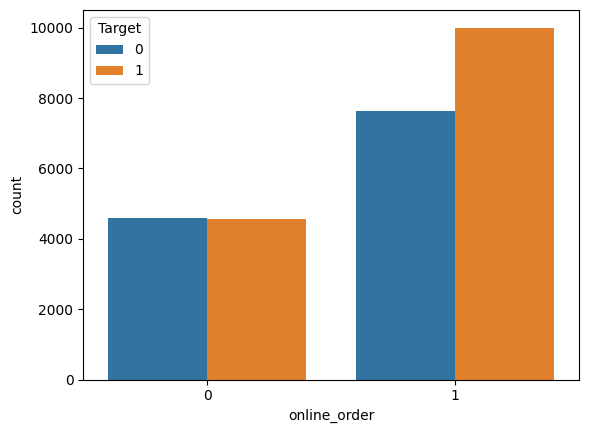

In [40]:
# Rating is higher when online_service is available
sns.countplot(x='online_order' , data=df , hue='Target')

### 2. Pie chart to book_table

In [41]:
x = df['book_table'].value_counts()
labels = df['book_table'].value_counts().index
x

book_table
0    21622
1     5169
Name: count, dtype: int64

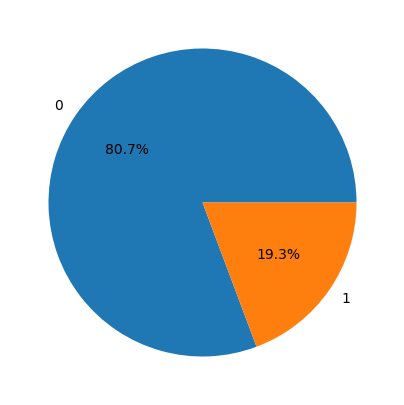

In [42]:
plt.figure(figsize = (5,5))
plt.pie(x, labels=labels, autopct='%1.1f%%')
plt.show()

In [43]:
df[(df['Target']==1) & (df['votes']<800)].sort_values(by='votes' , ascending=False).head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,Target
9826,Pin Me Down,1,1,4.5,799,BTM,Casual Dining,others,800.0,Dine-out,1
18323,Rooftop Cafe,1,0,4.1,799,Jayanagar,Cafe,others,400.0,Cafes,1
8282,Rooftop Cafe,1,0,4.1,799,Jayanagar,Cafe,others,400.0,Delivery,1
8139,Pin Me Down,1,1,4.5,799,BTM,Casual Dining,others,800.0,Delivery,1
25384,Zee5 Loft,1,0,4.4,798,HSR,Cafe,others,700.0,Delivery,1


### 2. Rating Distribution of `rate`

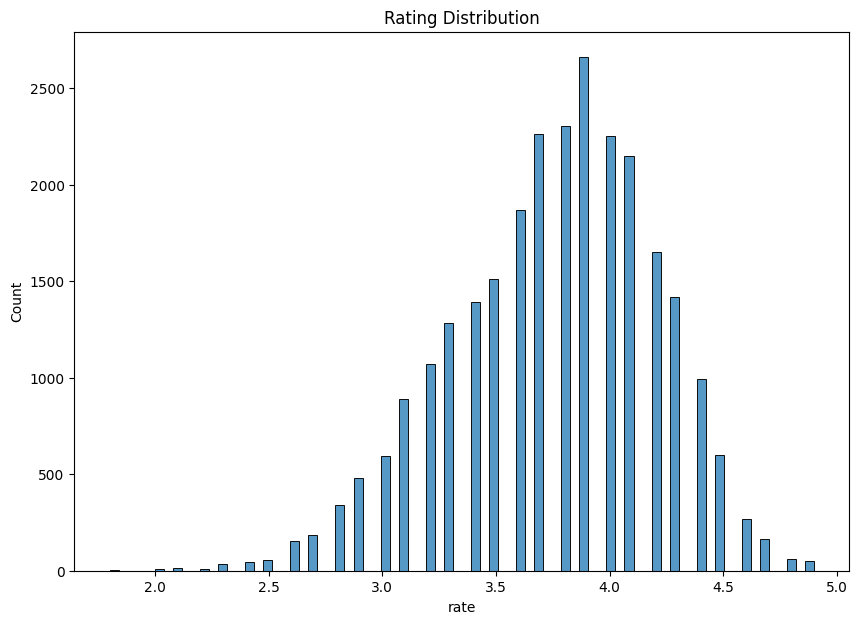

In [44]:
plt.figure(figsize=(10,7))
# Using histplot
sns.histplot(df['rate'])
plt.title('Rating Distribution')
plt.show()

### 3. Visualizing Online Order

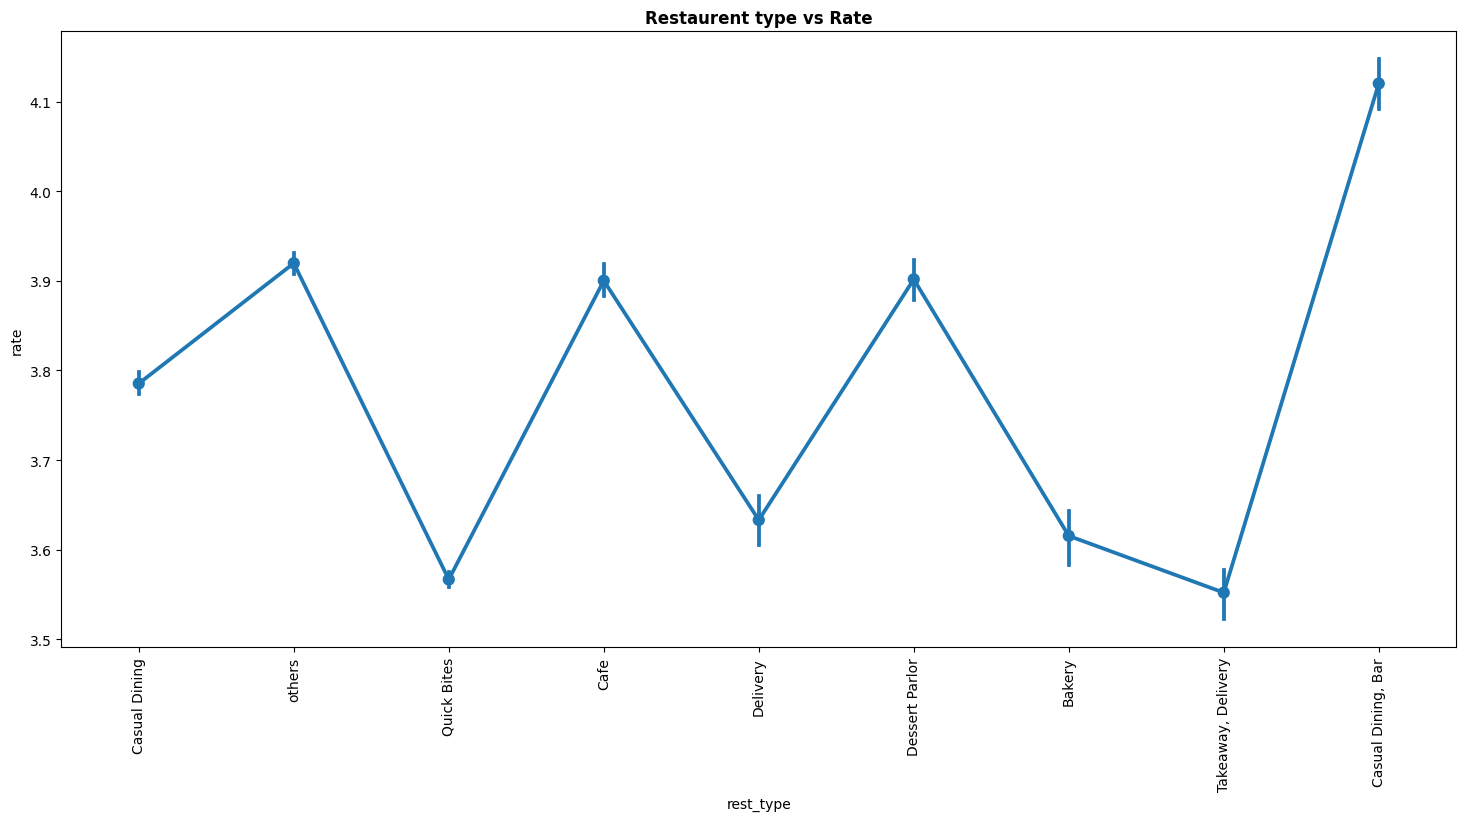

In [46]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=df["rest_type"], y=df["rate"], data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

### 4. What type of restaurants are most common in Bengaluru?

Text(0.5, 1.0, 'Count Of Restaurants Per Restaurant Type')

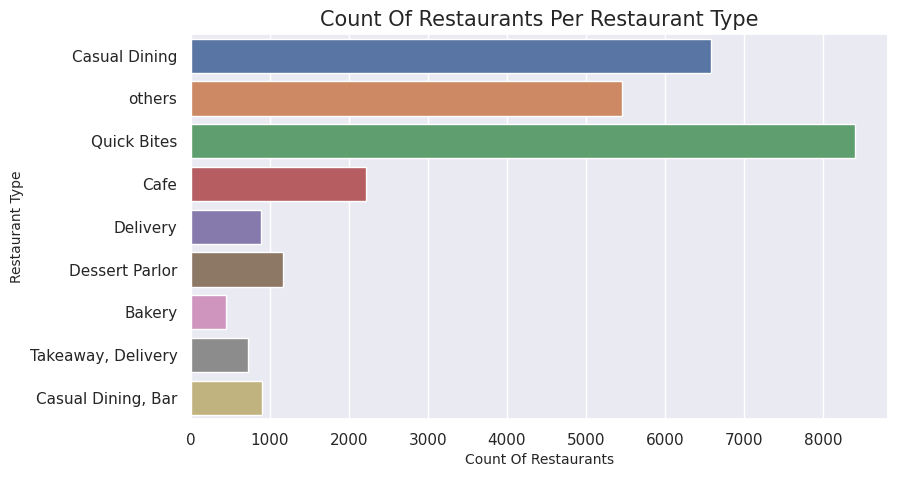

In [47]:
sns.set(rc={'figure.figsize':(9,5)})
sns.countplot(data = df, y="rest_type")
plt.ylabel("Restaurant Type", fontsize = 10)
plt.xlabel("Count Of Restaurants", fontsize= 10)
plt.title("Count Of Restaurants Per Restaurant Type", fontsize = 15)

### 5. online order with Target

<Axes: xlabel='online_order', ylabel='count'>

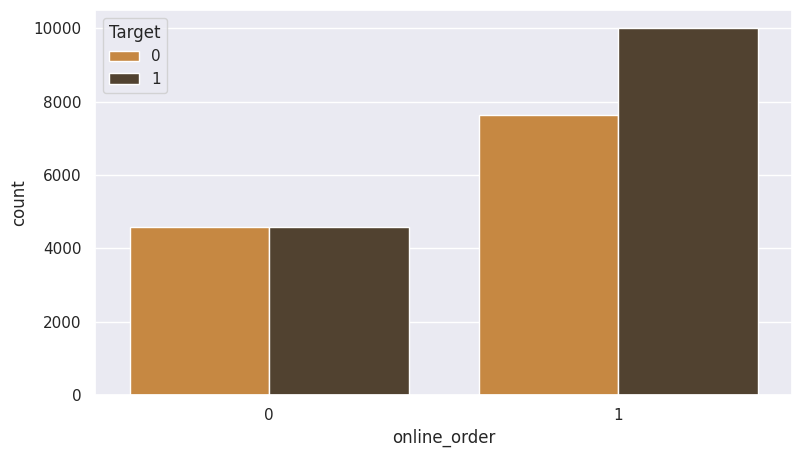

In [48]:
sns.countplot(x='online_order',data=df, hue='Target' ,palette=['#DC892C',"#57422A"])

### 6. Book Table for Target

<Axes: xlabel='book_table', ylabel='count'>

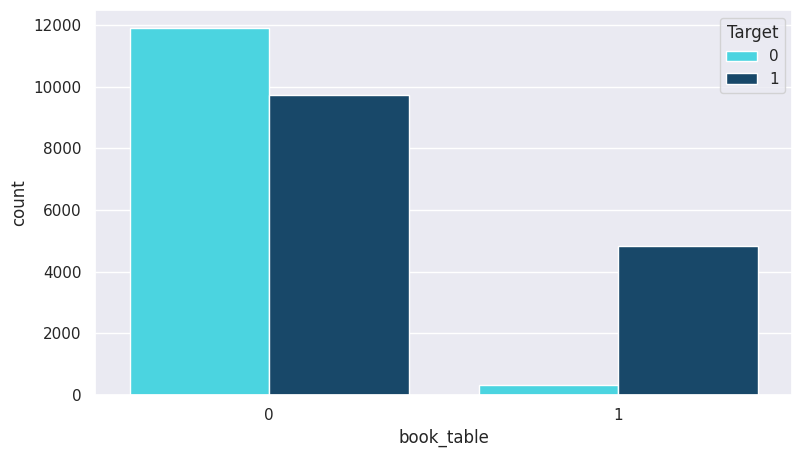

In [49]:
sns.countplot(x='book_table',data=df, hue='Target', palette=['#32E9F9',"#0A4A76"])

### 7. Visualizing Book Table vs Rate


<Axes: xlabel='book_table', ylabel='rate'>

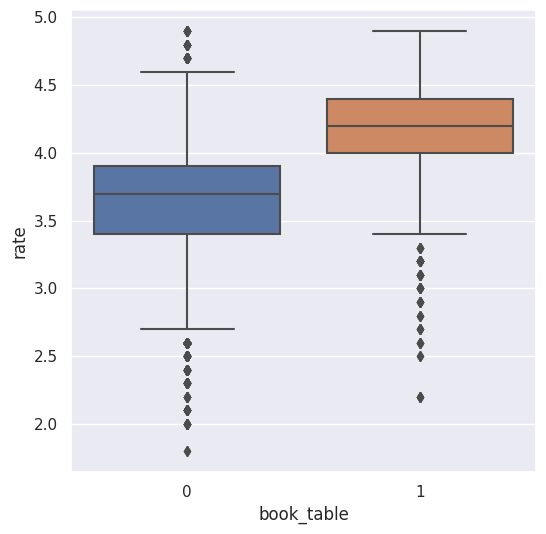

In [50]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

### 8. Visualizing Online Order Facility, Location Wise


In [51]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1.head().T

location            BTM  Banashankari  Banaswadi  Bannerghatta Road  \
     online_order                                                     
name 0              403           169        108                243   
     1             1310           290        190                583   

location           Basavanagudi  
     online_order                
name 0                      128  
     1                      252

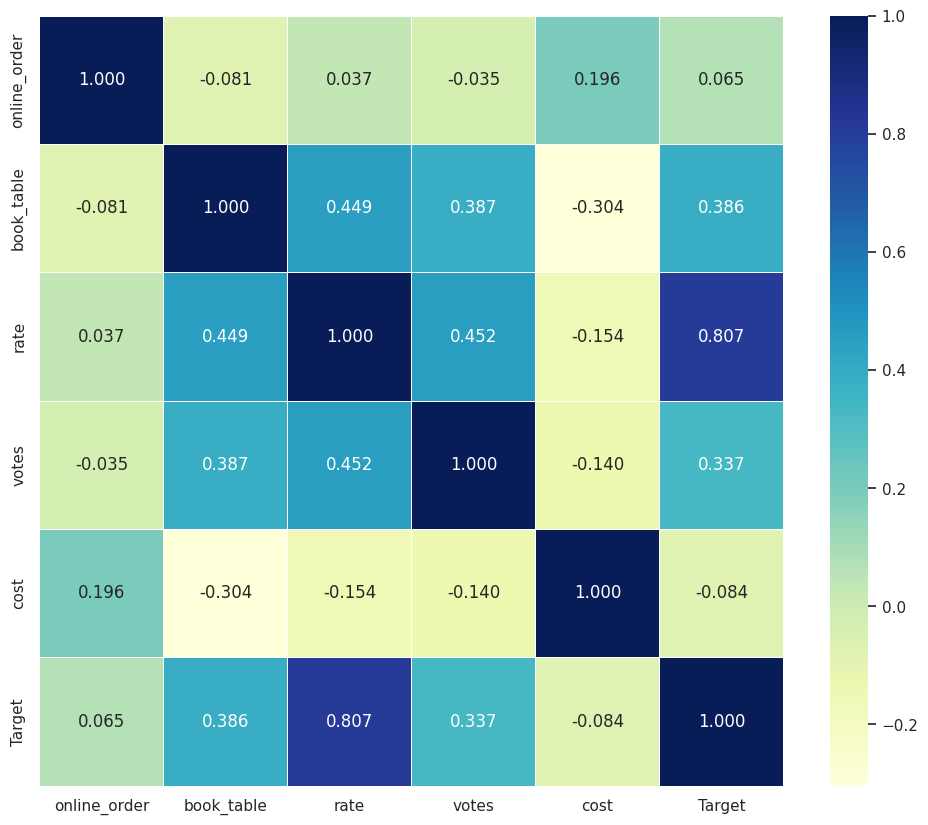

In [52]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(df.select_dtypes("number").corr(), cmap='YlGnBu', annot=True, fmt='.3f', linewidths=0.5);

### Number of Votes stands to Location of restaurant

In [53]:
VperL = df[['location', 'votes']]
VperL.drop_duplicates()
VperL = VperL.groupby(['location'])['votes'].sum()
VperL = VperL.to_frame()
VperL = VperL.sort_values('votes', ascending = False)
VperL.head()

,votes
location,
Koramangala 5th Block,1927640
Indiranagar,1123218
Koramangala 4th Block,580110
Church Street,553261
JP Nagar,472571


### Top Resturants for Votes

<Axes: xlabel='votes', ylabel='location'>

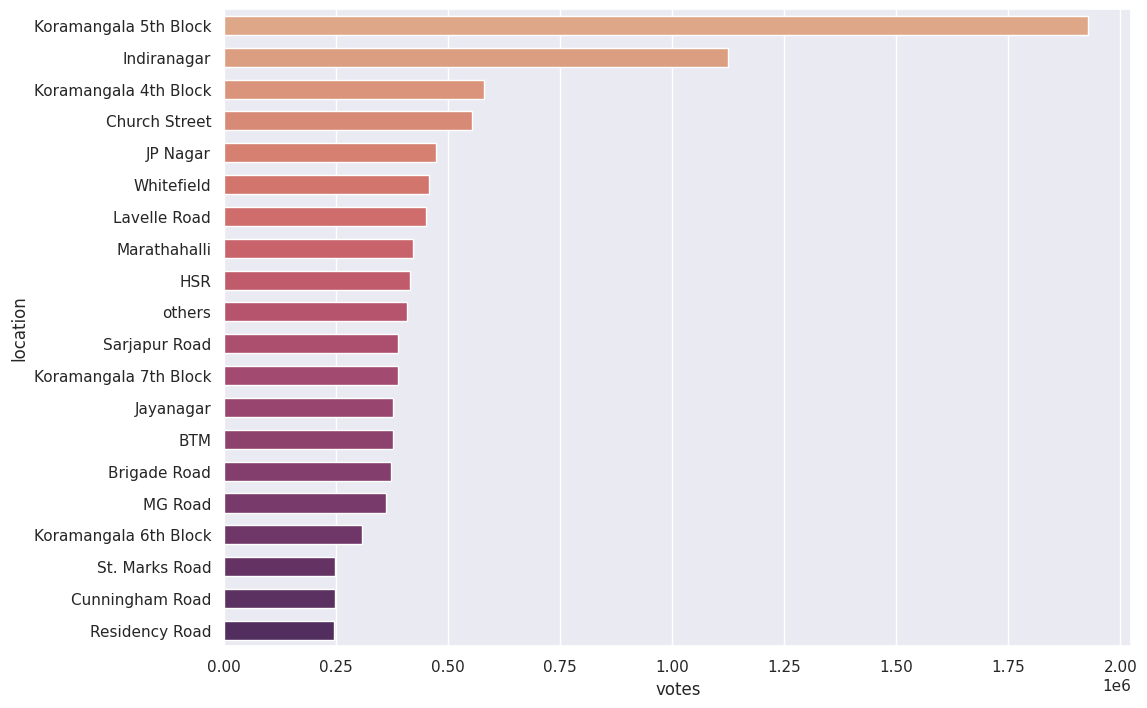

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='votes' , y=VperL.index[:20] , data=VperL[:20],width=0.6 , palette='flare')

### Grouping Types of Restaurents, location wise


In [55]:
df3 = df.groupby(['location','rest_type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['rest_type'], fill_value=0, aggfunc=np.sum)
df3.head(3)

name                                                 \
rest_type    Bakery Cafe Casual Dining Casual Dining, Bar Delivery   
location                                                             
BTM              27  103           316                 20       58   
Banashankari     10   58            86                  0       12   
Banaswadi         8   25            69                  6        3   

                                                                   
rest_type    Dessert Parlor Quick Bites Takeaway, Delivery others  
location                                                           
BTM                      43         846                109    191  
Banashankari             27         201                  5     60  
Banaswadi                 5         130                  8     44

# Data Analysis

#### We will ask our Data Questions and will give us response:
- No. of restaurants in a Location
- Is there any difference b/w votes of restaurants accepting and not accepting online orders?
- Check if there was relation between rate and Votes

### 1. No. of restaurants in a Location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

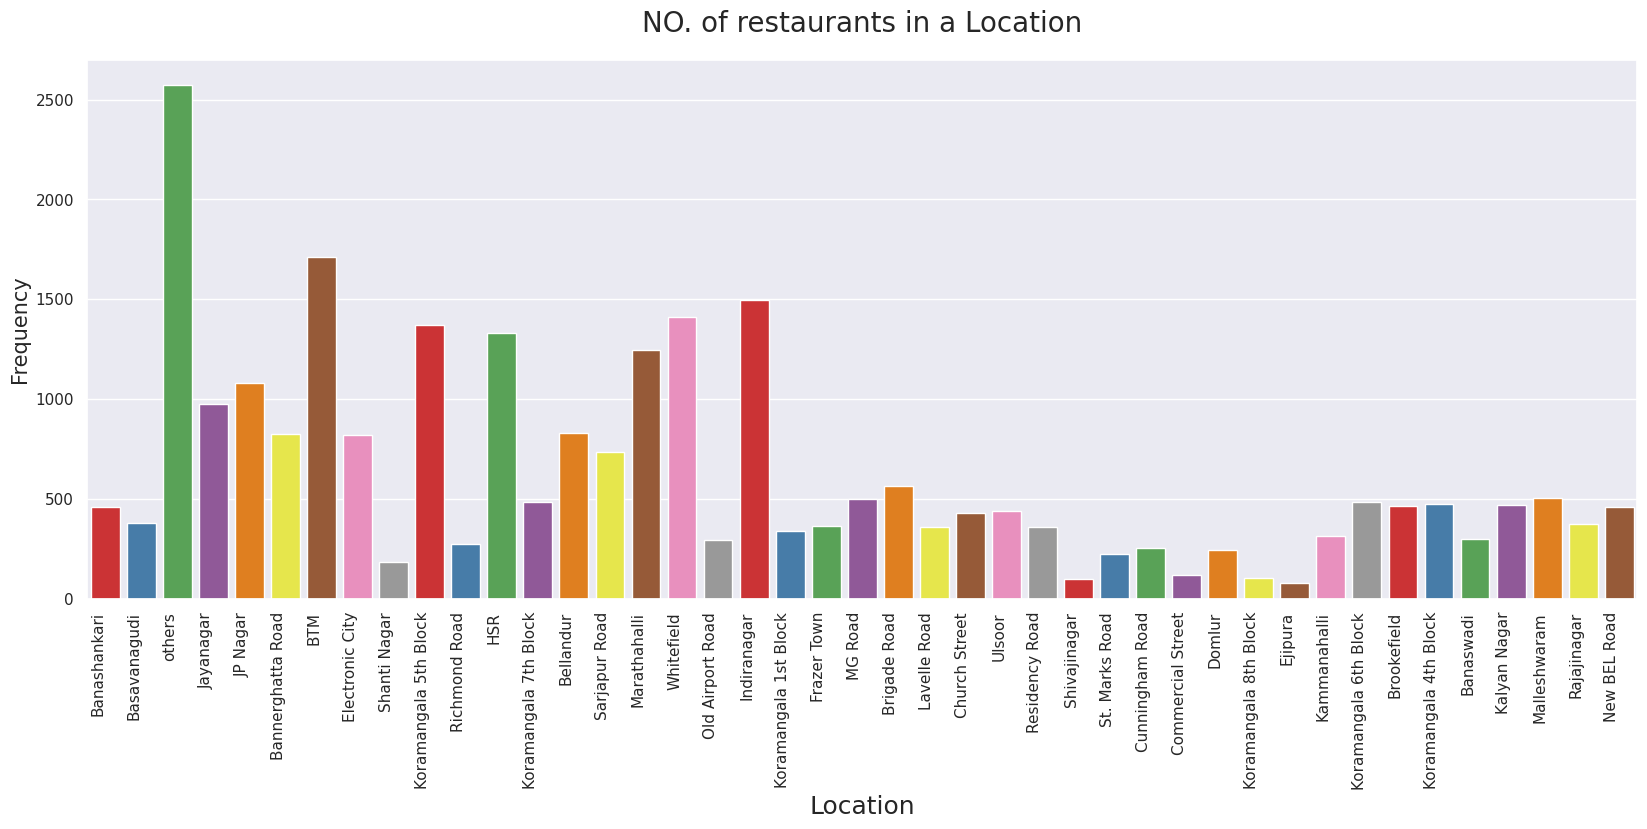

In [56]:
#NO. of restaurants in a Location',
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Koramangala 5th Block'),
  Text(10, 0, 'Richmond Road'),
  Text(11, 0, 'HSR'),
  Text(12, 0, 'Koramangala 7th Block'),
  Text(13, 0, 'Bellandur'),
  Text(14, 0, 'Sarjapur Road'),
  Text(15, 0, 'Marathahalli'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'MG Road'),
  Text(22, 0, 'Brigade Road'),
  Text(23, 0, 'Lavelle Road'),
  Text(24, 0, 'Church Street'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0,

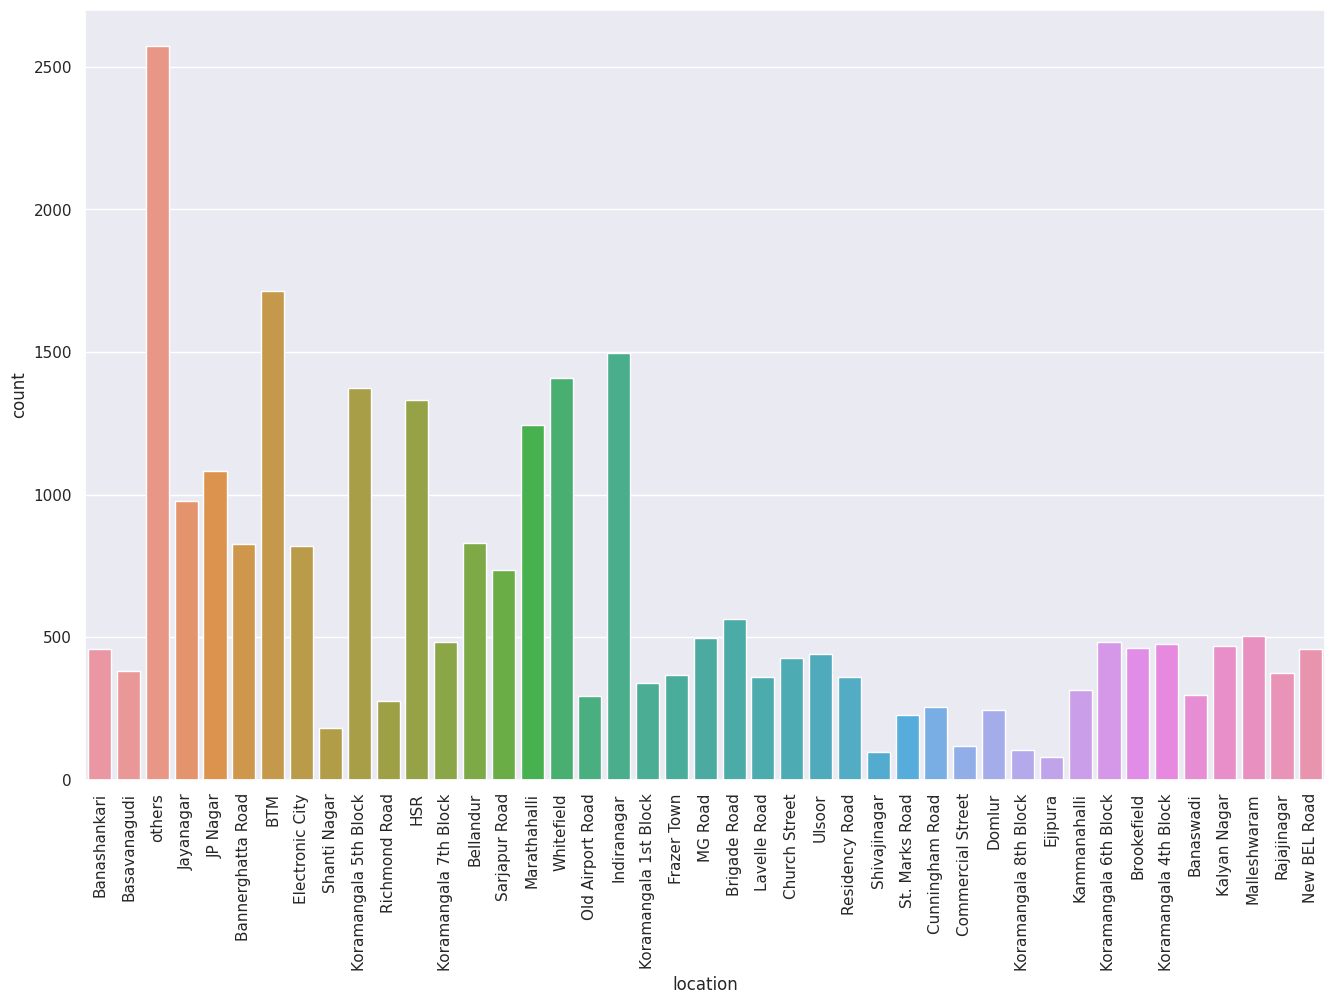

In [57]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=df, x=df['location'])
plt.xticks(rotation=90) #for clear x axis

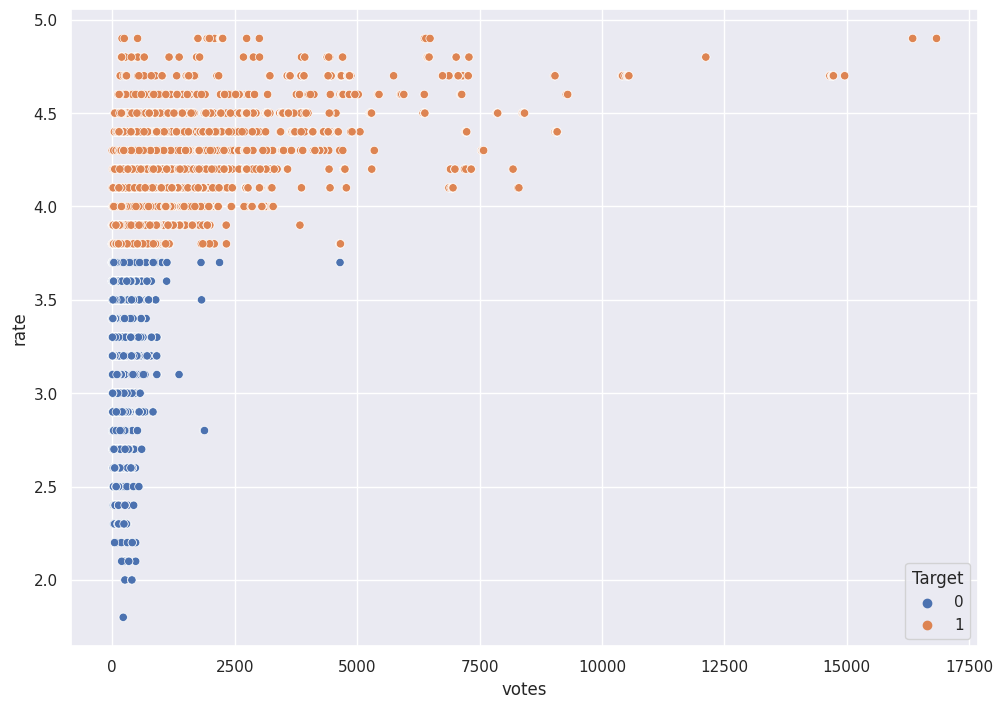

In [58]:
# Use seaborn scatterplot function to create a scatterplot of the votes column and the rate column by the Target column
sns.scatterplot(x="votes", y="rate", hue="Target", data=df)
plt.show()

## Feature Encoding

In [59]:
df.drop(['name', 'type'], axis=1, inplace=True)

In [60]:
df_copy = df.copy()

In [61]:
from sklearn.preprocessing import LabelEncoder
cat_to_num = df_copy[['location','rest_type','cuisines']]
le = LabelEncoder() 
for i in cat_to_num:
    df_copy[i] = le.fit_transform(cat_to_num[i])

In [62]:
df_copy.to_csv('data.csv')

# Modeling

Make machine learning Model using many techniques such as **Feature selection**
also we will use many classification algorithms such as:
- Logistic Regression
- SVM
- XGBoost classifier
- Decision Tree Classification
- Random Forest Classification
- Naive Bayes Classifier

in **Model Evaluation** Section We will use:
- accuarcy score
- Classification Report
- Precision, recall, F1-score
- Confusion Matrix
Finaly we will finish with **Model Deployment**

### Cross Validation & Classification Report & Precision, Recall, F1-score

#### Use cross-validation to validate our model on the train data

Cross-validation is a technique that splits the train data into k folds and uses k-1 folds for training and 1 fold for validation

It repeats this process k times and averages the validation scores to get a more reliable estimate of the model's performance

You can use cross_val_score function from scikit-learn to perform cross-validation and get the validation scores for each fold

You can specify the number of folds using cv parameter and the scoring metric using scoring parameter

In this case, we use 5 folds and accuracy as the scoring metric

## split the data

In [63]:
# Define input and output variables
X = df_copy.drop(['Target', 'rate'], axis=1) # Input variables are all columns except Target
y = df_copy["Target"] # Output variable is Target

## Feature Selection

In [64]:
# Feature selection using SelectKBest and chi2
# SelectKBest is a filter method that selects the k best features based on a scoring function
# chi2 is a scoring function that measures the dependence between categorical variables using chi-square test
# Create an instance of SelectKBest class with k=5 and chi2 as scoring function
selector = SelectKBest(chi2, k=5)

# Fit and transform the input variables using feature selection
X_new = selector.fit_transform(X,y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

##### I created Function that aim to train more than one classifier
1. Splits the input data X into training and testing sets using the train_test_split function. The training set is used to train the classifier, while the testing set is used for evaluation.

2. Fits the classifier (clf) on the training data (X_train, y_train) using the fit method.

3. Predicts the labels for both the training and testing data using the predict method of the classifier. The predicted labels for the training data are stored in y_pred_train, and the predicted labels for the testing data are stored in y_pred_test.

4. Calculates the accuracy scores for both the training and testing data using the accuracy_score function. The accuracy score represents the proportion of correctly predicted labels.

5. Prints the accuracy scores for the training and testing data.

6. Performs cross-validation on the training data using the cross_val_score function. It splits the training data into five folds and evaluates the classifier's performance using the "accuracy" scoring metric.

7. Prints the cross-validation scores, the mean cross-validation score, and the standard deviation of the cross-validation scores.

8. Predicts the labels for the testing data using the predict method, and stores the predicted labels in y_pred.

9. Calculates the accuracy score for the testing data using the accuracy_score function.

10. Prints the accuracy score for the testing data.

11. Calculates the precision, recall, and F1-score for the testing data using the precision_score, recall_score, and f1_score functions, respectively. These metrics provide insights into the classifier's performance in terms of precision (ability to correctly predict positive instances), recall (ability to correctly identify positive instances), and F1-score (harmonic mean of precision and recall).

12. Prints the precision, recall, and F1-score.

13. Prints the classification report for the testing data using the classification_report function. The classification report provides a detailed summary of the precision, recall, F1-score, and support for each class in the dataset.

In [65]:
def evaluate_classifier(clf, X_new, y):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Fit the classifier on the train data
    clf.fit(X_train, y_train)

    # Predict on the train and test data
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calculate the accuracy score for train and test data
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    # Print the accuracy scores
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

    # Print the mean and standard deviation of the cross-validation scores
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
    print(f"Standard deviation of cross-validation score: {cv_scores.std():.4f}")

    # Predict on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score for test data
    test_acc = accuracy_score(y_test, y_pred)

    # Print the test accuracy score
    print(f"Test Accuracy: {test_acc:.4f}")

    # Calculate the precision, recall, and f1-score for test data
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the precision, recall, and f1-score
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Print the classification report for test data
    print(classification_report(y_test, y_pred))

# Model Evaluation and Train the Classifier

### 1. Logistic Regression Classifier

In [66]:
clf = LogisticRegression(penalty='l2', solver='liblinear')
evaluate_classifier(clf, X_new, y)

Train Accuracy: 0.7685
Test Accuracy: 0.7707
Cross-validation scores: [0.77070212 0.76557033 0.77461503 0.76598227 0.76411573]
Mean cross-validation score: 0.7682
Standard deviation of cross-validation score: 0.0039
Test Accuracy: 0.7707
Precision: 0.8796
Recall: 0.6801
F1-score: 0.7671
              precision    recall  f1-score   support

           0       0.69      0.88      0.77      2383
           1       0.88      0.68      0.77      2976

    accuracy                           0.77      5359
   macro avg       0.78      0.78      0.77      5359
weighted avg       0.79      0.77      0.77      5359



### 2. SVM Classifier

In [67]:
svm = SVC(kernel='linear', C=1.0)
evaluate_classifier(svm, X_new, y)

### 3. XGBoost Classifier

In [68]:
xgb = GradientBoostingClassifier(n_estimators=100)
evaluate_classifier(xgb, X_new, y)

Train Accuracy: 0.8277
Test Accuracy: 0.8300
Cross-validation scores: [0.82108701 0.82132027 0.82571162 0.82454503 0.814979  ]
Mean cross-validation score: 0.8215
Standard deviation of cross-validation score: 0.0037
Test Accuracy: 0.8300
Precision: 0.8422
Recall: 0.8538
F1-score: 0.8480
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2383
           1       0.84      0.85      0.85      2976

    accuracy                           0.83      5359
   macro avg       0.83      0.83      0.83      5359
weighted avg       0.83      0.83      0.83      5359



### 3. RandomForest Classifier

In [69]:
rfc = RandomForestClassifier(n_estimators=100)
evaluate_classifier(rfc, X_new, y)

Train Accuracy: 0.9779
Test Accuracy: 0.9270
Cross-validation scores: [0.92069046 0.90809424 0.90457303 0.90783948 0.90433971]
Mean cross-validation score: 0.9091
Standard deviation of cross-validation score: 0.0060
Test Accuracy: 0.9270
Precision: 0.9425
Recall: 0.9251
F1-score: 0.9337
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2383
           1       0.94      0.93      0.93      2976

    accuracy                           0.93      5359
   macro avg       0.93      0.93      0.93      5359
weighted avg       0.93      0.93      0.93      5359



### 4. DecisionTree Classifier 

In [70]:
dtc = DecisionTreeClassifier()
evaluate_classifier(dtc, X_new, y)

Train Accuracy: 0.9779
Test Accuracy: 0.9145
Cross-validation scores: [0.90342897 0.8898997  0.88964069 0.89384041 0.89734018]
Mean cross-validation score: 0.8948
Standard deviation of cross-validation score: 0.0051
Test Accuracy: 0.9145
Precision: 0.9341
Recall: 0.9103
F1-score: 0.9221
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2383
           1       0.93      0.91      0.92      2976

    accuracy                           0.91      5359
   macro avg       0.91      0.92      0.91      5359
weighted avg       0.92      0.91      0.91      5359



### 5. Naive Bayes Classifier

In [71]:
nbc = GaussianNB()
evaluate_classifier(nbc, X_new, y)

Train Accuracy: 0.7075
Test Accuracy: 0.7067
Cross-validation scores: [0.71052018 0.70632144 0.71325245 0.70741951 0.70298647]
Mean cross-validation score: 0.7081
Standard deviation of cross-validation score: 0.0035
Test Accuracy: 0.7067
Precision: 0.9382
Recall: 0.5050
F1-score: 0.6566
              precision    recall  f1-score   support

           0       0.61      0.96      0.74      2383
           1       0.94      0.51      0.66      2976

    accuracy                           0.71      5359
   macro avg       0.77      0.73      0.70      5359
weighted avg       0.79      0.71      0.70      5359



In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

def evaluate_classifier(clf, X_new, y):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Fit the classifier on the train data
    clf.fit(X_train, y_train)

    # Predict on the train and test data
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calculate the accuracy score for train and test data
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

    # Predict on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score for test data
    test_acc = accuracy_score(y_test, y_pred)

    # Calculate the precision, recall, and f1-score for test data
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Return the accuracy scores
    return train_acc, test_acc

# Create empty lists to store accuracy values
train_acc_list = []
test_acc_list = []

# Define the classifiers
classifiers = [LogisticRegression(penalty='l2', solver='liblinear'),
               SVC(),
               GradientBoostingClassifier(n_estimators=100),
               RandomForestClassifier(n_estimators=100),
               DecisionTreeClassifier(),
               GaussianNB()]

# Iterate over classifiers and collect accuracy values
for clf in classifiers:
    train_acc, test_acc = evaluate_classifier(clf, X_new, y)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

# Create DataFrame with accuracy values
accuracy_df = pd.DataFrame({"Train Accuracy": train_acc_list, "Test Accuracy": test_acc_list})

# Set algorithm names as index
algorithm_names = ["Logistic Regression", "SVM", "Gradient Boosting", "Random Forest", "Decision Tree", "Naive Bayes"]
accuracy_df.index = algorithm_names

# Display the DataFrame
print(accuracy_df)


                     Train Accuracy  Test Accuracy
Logistic Regression        0.768477       0.770666
SVM                        0.792087       0.802575
Gradient Boosting          0.827734       0.830006
Random Forest              0.977930       0.926665
Decision Tree              0.977930       0.915283
Naive Bayes                0.707540       0.706662


# Model improvement

I will make some improvements for the highst algorithm Performance through using Adjust Hyper Parameters after using Cross Validation only in our function 
**In this cell we will use GridSearchCV with Cross Validation**

we define a param_grid dictionary that contains the hyperparameters and their corresponding ranges we want to search over.

We then create a Random Forest Classifier and use GridSearchCV to perform a grid search with 5-fold cross-validation to find the best hyperparameters based on the accuracy metric.

### Firsrt I will split my data using train_test_split into 80% train and 20% test

In [73]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [74]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],             # Number of decision trees in the forest
    'max_depth': [None, 5, 10],                   # Maximum depth of each decision tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'max_features': ['sqrt', 'log2']             # Number of features to consider when looking for the best split
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Train Accuracy: 0.9779
Test Accuracy: 0.9269
Best Hyperparameters:
max_depth: None
max_features: log2
min_samples_split: 2
n_estimators: 200


# Saving Models

We will use joblib to save our Model to use it in our Deployment

In [75]:
# Save the model to a file
joblib.dump(rfc, 'random_forest_model_.pkl')

['random_forest_model_.pkl']